Accuracy on the test set: 0.8823529411764696


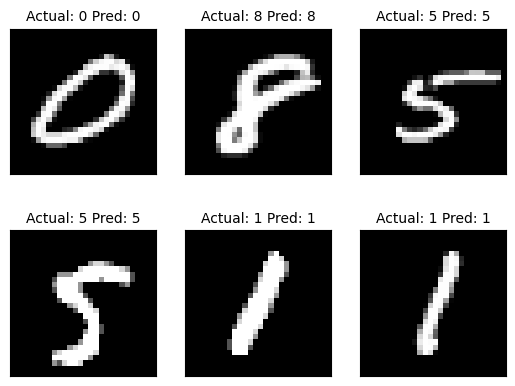

In [5]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.disable_eager_execution()

# Load MNIST data using tf.keras.datasets
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images and normalize pixel values to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

train_size = 1000
test_size = 102

rand_train_indices = np.random.choice(len(x_train), train_size, replace=False)
rand_test_indices = np.random.choice(len(x_test), test_size, replace=False)

x_vals_train = x_train[rand_train_indices].reshape((-1, 28 * 28))
x_vals_test = x_test[rand_test_indices].reshape((-1, 28 * 28))
y_vals_train = tf.keras.utils.to_categorical(y_train[rand_train_indices], num_classes=10)
y_vals_test = tf.keras.utils.to_categorical(y_test[rand_test_indices], num_classes=10)

k = 4
batch_size = 6

x_data_train = tf.compat.v1.placeholder(shape=[None, 784], dtype=tf.float32)
x_data_test = tf.compat.v1.placeholder(shape=[None, 784], dtype=tf.float32)
y_target_train = tf.compat.v1.placeholder(shape=[None, 10], dtype=tf.float32)
y_target_test = tf.compat.v1.placeholder(shape=[None, 10], dtype=tf.float32)

distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis=2)
top_k_xvals, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
prediction_indices = tf.gather(y_target_train, top_k_indices)
count_of_predictions = tf.reduce_sum(prediction_indices, axis=1)
prediction = tf.argmax(count_of_predictions, axis=1)

num_loops = int(np.ceil(len(x_vals_test) / batch_size))
test_output = []
actual_vals = []

with tf.compat.v1.Session() as sess:
    for i in range(num_loops):
        min_index = i * batch_size
        max_index = min((i + 1) * batch_size, len(x_vals_train))
        x_batch = x_vals_test[min_index:max_index]
        y_batch = y_vals_test[min_index:max_index]
        predictions = sess.run(
            prediction,
            feed_dict={x_data_train: x_vals_train, x_data_test: x_batch, y_target_train: y_vals_train, y_target_test: y_batch}
        )
        test_output.extend(predictions)
        actual_vals.extend(np.argmax(y_batch, axis=1))

accuracy = sum([1. / test_size for i in range(test_size) if test_output[i] == actual_vals[i]])
print('Accuracy on the test set: ' + str(accuracy))

actuals = np.argmax(y_batch, axis=1)
Nrows = 2
Ncols = 3

for i in range(len(actuals)):
    plt.subplot(Nrows, Ncols, i + 1)
    plt.imshow(np.reshape(x_batch[i], [28, 28]), cmap='Greys_r')
    plt.title('Actual: ' + str(actuals[i]) + ' Pred: ' + str(predictions[i]), fontsize=10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()